In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
Titanic_Train_Frame = pd.read_csv('train.csv')

In [17]:
Titanic_Train_Frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
Titanic_Train_Frame = Titanic_Train_Frame.drop("Cabin",axis = 1)

In [19]:
Titanic_Train_Frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
Titanic_Train_Frame.shape

(891, 11)

In [21]:
Titanic_Train_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [22]:
pd.crosstab(Titanic_Train_Frame['Sex'],Titanic_Train_Frame['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [23]:
Titanic_Train_Frame.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [24]:
pd.crosstab(Titanic_Train_Frame['Pclass'],Titanic_Train_Frame['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


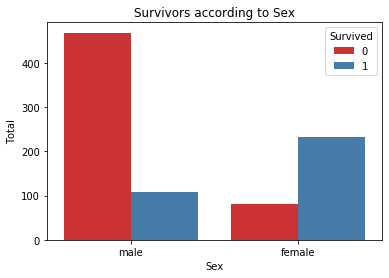

In [25]:
ax = sns.countplot(x = 'Sex', hue = 'Survived',palette = 'Set1',data=Titanic_Train_Frame)
ax.set(title="Survivors according to Sex",xlabel="Sex",ylabel = "Total")
plt.show()

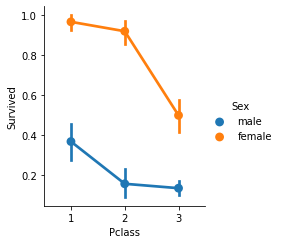

In [26]:
sns.factorplot(x='Pclass',y='Survived',hue='Sex',data = Titanic_Train_Frame, aspect = 0.9,size=3.5);


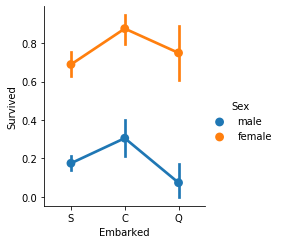

In [27]:
sns.factorplot(x='Embarked',y='Survived',hue='Sex',data = Titanic_Train_Frame, aspect = 0.9,size=3.5);


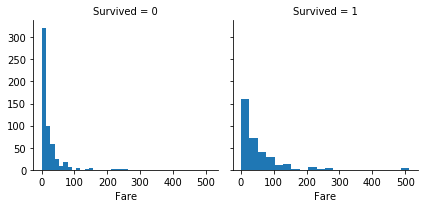

In [28]:
graph = sns.FacetGrid(Titanic_Train_Frame,col="Survived");
graph.map(plt.hist,"Fare",bins=20)

Outliers more than 400, instead of taking out the point and distorting the data set, we'll just replace it with the median value

use loc to locate values meeting criteria

In [29]:
Titanic_Train_Frame.loc[Titanic_Train_Frame['Fare'] > 400,'Fare'] = Titanic_Train_Frame.median()

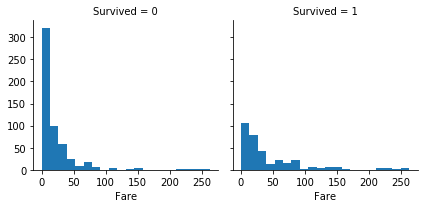

In [30]:
graph = sns.FacetGrid(Titanic_Train_Frame,col="Survived");
graph.map(plt.hist,"Fare",bins=20)

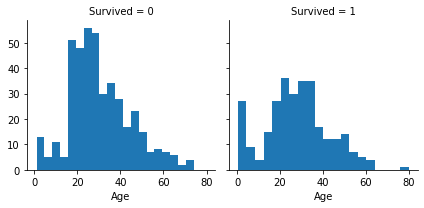

In [31]:
graph_age = sns.FacetGrid(Titanic_Train_Frame,col="Survived");
graph_age.map(plt.hist,"Age",bins=20)

In [32]:
Age_Values = Titanic_Train_Frame.loc[Titanic_Train_Frame['Age'] >= 60,'Age']

In [33]:
Age_Values.describe()

count    26.000000
mean     65.096154
std       5.110811
min      60.000000
25%      61.250000
50%      63.500000
75%      69.000000
max      80.000000
Name: Age, dtype: float64

In [34]:
Titanic_Train_Frame.loc[Titanic_Train_Frame['Age'] >= 60,'Age'] = 69#Titanic_Train_Frame.median()

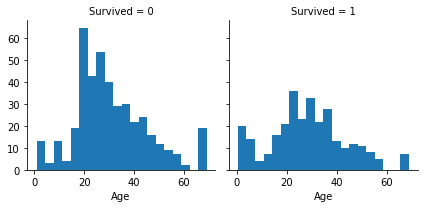

In [35]:
graph_age = sns.FacetGrid(Titanic_Train_Frame,col="Survived");
graph_age.map(plt.hist,"Age",bins=20)

In [36]:
for column in Titanic_Train_Frame:
    print(column,' : ',Titanic_Train_Frame[column].isnull().sum())

PassengerId  :  0
Survived  :  0
Pclass  :  0
Name  :  0
Sex  :  0
Age  :  177
SibSp  :  0
Parch  :  0
Ticket  :  0
Fare  :  3
Embarked  :  2


In [37]:
Titanic_Train_Frame['Age'].fillna(Titanic_Train_Frame['Age'].median(),inplace = True);

In [38]:
for column in Titanic_Train_Frame:
    print(column,' : ',Titanic_Train_Frame[column].isnull().sum())

PassengerId  :  0
Survived  :  0
Pclass  :  0
Name  :  0
Sex  :  0
Age  :  0
SibSp  :  0
Parch  :  0
Ticket  :  0
Fare  :  3
Embarked  :  2


In [39]:
print(Titanic_Train_Frame['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [40]:
Titanic_Train_Frame['Embarked'].fillna('S',inplace = True);

In [41]:
Titanic_Train_Frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [42]:
def GetTitle(Person_Name):
    if '.' in Person_Name:
        return Person_Name.split(',')[1].split('.')[0].strip();
    else:
        print("No title in name")

In [43]:
titles = set([x for x in Titanic_Train_Frame.Name.map(lambda y:GetTitle(y))]);

In [44]:
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [120]:
def shorter_titles(x):
    #title = x['Title'];
    if str(x) in ['Capt','Col','Major']:
        return 'Officer';
    elif str(x) in ['Jonkheer','Don','Dona','the Countess','Lady','Sir']:
        return 'Royalty';
    elif str(x) == 'Mme':
        return 'Mrs';
    elif str(x) in ['Mlle','Ms']:
        return 'Miss';
    else:
        return str(x);

In [46]:
Titanic_Train_Frame['Titles'] = Titanic_Train_Frame['Name'].map(lambda x: GetTitle(x));

In [47]:
Titanic_Train_Frame['Titles'] = Titanic_Train_Frame['Titles'].map(lambda x: shorter_titles(x));

In [48]:
Titanic_Train_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           888 non-null float64
Embarked       891 non-null object
Titles         891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
Titanic_Train_Frame.drop("Name",axis = 1,inplace = True);

In [50]:
Titanic_Train_Frame

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titles
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr
5,6,0,3,male,28.0,0,0,330877,8.4583,Q,Mr
6,7,0,1,male,54.0,0,0,17463,51.8625,S,Mr
7,8,0,3,male,2.0,3,1,349909,21.0750,S,Master
8,9,1,3,female,27.0,0,2,347742,11.1333,S,Mrs
9,10,1,2,female,14.0,1,0,237736,30.0708,C,Mrs


In [51]:
print(Titanic_Train_Frame.Titles.value_counts())

Mr         517
Miss       185
Mrs        126
Master      40
Dr           7
Rev          6
Royalty      5
Officer      5
Name: Titles, dtype: int64


In [52]:
del Titanic_Train_Frame['Ticket']

In [53]:
Titanic_Train_Frame

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr
5,6,0,3,male,28.0,0,0,8.4583,Q,Mr
6,7,0,1,male,54.0,0,0,51.8625,S,Mr
7,8,0,3,male,2.0,3,1,21.0750,S,Master
8,9,1,3,female,27.0,0,2,11.1333,S,Mrs
9,10,1,2,female,14.0,1,0,30.0708,C,Mrs


In [54]:
del Titanic_Train_Frame['PassengerId']

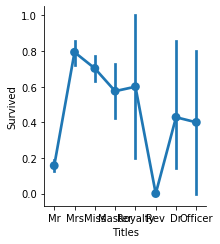

In [55]:
sns.factorplot(x='Titles',y='Survived',data = Titanic_Train_Frame, aspect = 0.9,size=3.5);


In [56]:
Titanic_Train_Frame.Sex.replace(('male','female'),(0,1),inplace = True)

In [57]:
Titanic_Train_Frame.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
Titanic_Train_Frame.Embarked.replace(('S','C','Q'),(0,1,2),inplace = True);

In [59]:
Titanic_Train_Frame.Titles.replace(('Mr','Miss','Mrs','Master','Dr','Rev','Officer','Royalty'),(0,1,2,3,4,5,6,7),inplace = True);

In [60]:
Titanic_Train_Frame

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,0
5,0,3,0,28.0,0,0,8.4583,2,0
6,0,1,0,54.0,0,0,51.8625,0,0
7,0,3,0,2.0,3,1,21.0750,0,3
8,1,3,1,27.0,0,2,11.1333,0,2
9,1,2,1,14.0,1,0,30.0708,1,2


In [61]:
Titanic_Train_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        888 non-null float64
Embarked    891 non-null int64
Titles      891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


# Train/Test

In [67]:
from sklearn.model_selection import train_test_split

In [83]:
Titanic_Train_Frame['Fare'].fillna(Titanic_Train_Frame['Fare'].median(),inplace = True);

In [93]:
y = Titanic_Train_Frame['Survived'];
x = Titanic_Train_Frame.drop(['Survived'],axis = 1);

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

Hit shit tab!

In [95]:
#train_test_split()

In [96]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [97]:
for column in x_train:
    print(column,' : ',x_train[column].isna().sum())

Pclass  :  0
Sex  :  0
Age  :  0
SibSp  :  0
Parch  :  0
Fare  :  0
Embarked  :  0
Titles  :  0


In [101]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train,y_train);
y_pred = randomforest.predict(x_test);
accuracy_RF = round(accuracy_score(y_pred,y_test)*100,2);
print(accuracy_RF);

pickle.dump(randomforest,open('titanic_model.sav','wb'));

77.78


c:\python3_64\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [171]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np


In [172]:
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [173]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(x_test)]
best_n_estimators = np.argmin(errors)

In [174]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [175]:
y_pred = best_regressor.predict(x_test)
mean_absolute_error(y_test, y_pred)

0.2878841086906687

In [201]:
from sklearn import svm
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)

In [ ]:
#svm.SVC()

In [155]:
Titanic_Test_Frame = pd.read_csv('test.csv');
ids = Titanic_Test_Frame['PassengerId']

In [156]:
Titanic_Test_Frame.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [157]:
Titanic_Test_Frame = Titanic_Test_Frame.drop("Cabin",axis = 1);
Titanic_Test_Frame.loc[Titanic_Test_Frame['Fare'] > 400,'Fare'] = Titanic_Test_Frame.median();
Titanic_Test_Frame.loc[Titanic_Test_Frame['Age'] >= 60,'Age'] = 69#Titanic_Train_Frame.median()
Titanic_Test_Frame['Age'].fillna(Titanic_Test_Frame['Age'].median(),inplace = True);
Titanic_Test_Frame['Embarked'].fillna('S',inplace = True);
Titanic_Test_Frame['Fare'].fillna(Titanic_Test_Frame['Fare'].median(),inplace = True);
Titanic_Test_Frame['Titles'] = Titanic_Test_Frame['Name'].map(lambda x: GetTitle(x));
Titanic_Test_Frame['Titles'] = Titanic_Test_Frame['Titles'].map(lambda x: shorter_titles(x));
Titanic_Test_Frame.drop("Name",axis = 1,inplace = True);
del Titanic_Test_Frame['Ticket'];
del Titanic_Test_Frame['PassengerId'];
Titanic_Test_Frame.Sex.replace(('male','female'),(0,1),inplace = True);
Titanic_Test_Frame.Embarked.replace(('S','C','Q'),(0,1,2),inplace = True);
Titanic_Test_Frame.Titles.replace(('Mr','Miss','Mrs','Master','Dr','Rev','Officer','Royalty'),(0,1,2,3,4,5,6,7),inplace = True);

In [158]:
Titanic_Test_Frame.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,29.791866,0.447368,0.392344,34.385447,0.464115,0.763158
std,0.841838,0.481622,13.225006,0.896760,0.981429,50.732774,0.685516,1.094517
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.387500,1.000000,1.000000
max,3.000000,1.000000,69.000000,8.000000,9.000000,263.000000,2.000000,7.000000


In [159]:
for column in Titanic_Test_Frame:
    print(column,' : ',x_train[column].isna().sum())

Pclass  :  0
Sex  :  0
Age  :  0
SibSp  :  0
Parch  :  0
Fare  :  0
Embarked  :  0
Titles  :  0


In [160]:
Titanic_Test_Frame

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,3,0,34.5,0,0,7.8292,2,0
1,3,1,47.0,1,0,7.0000,0,2
2,2,0,69.0,0,0,9.6875,2,0
3,3,0,27.0,0,0,8.6625,0,0
4,3,1,22.0,1,1,12.2875,0,2
5,3,0,14.0,0,0,9.2250,0,0
6,3,1,30.0,0,0,7.6292,2,1
7,2,0,26.0,1,1,29.0000,0,0
8,3,1,18.0,0,0,7.2292,1,2
9,3,0,21.0,2,0,24.1500,0,0


In [161]:
Titanic_Test_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
Titles      418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [162]:
Titanic_Test_Frame.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,29.791866,0.447368,0.392344,34.385447,0.464115,0.763158
std,0.841838,0.481622,13.225006,0.896760,0.981429,50.732774,0.685516,1.094517
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.387500,1.000000,1.000000
max,3.000000,1.000000,69.000000,8.000000,9.000000,263.000000,2.000000,7.000000


In [163]:
predictions = randomforest.predict(Titanic_Test_Frame);
output = pd.DataFrame({'PassengerID':ids,'Survived':predictions});
output.to_csv('submission.csv',index=False);

In [195]:
predictions1 = regressor.predict(Titanic_Test_Frame);

In [191]:
predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [196]:
predictions1

array([ 0.13665267,  0.49927281,  0.13665267,  0.13665267,  0.49927281,
        0.13665267,  0.49927281,  0.13665267,  0.49927281,  0.13665267,
        0.13665267,  0.3919135 ,  0.91413572,  0.13665267,  0.91413572,
        0.91413572,  0.13665267,  0.13665267,  0.49927281,  0.49927281,
        0.3919135 ,  0.49927281,  0.91413572,  0.3919135 ,  0.91413572,
        0.13665267,  0.91413572,  0.13665267,  0.3919135 ,  0.13665267,
        0.13665267,  0.13665267,  0.49927281,  0.49927281,  0.3919135 ,
        0.13665267,  0.49927281,  0.49927281,  0.13665267,  0.13665267,
        0.13665267,  0.3919135 ,  0.13665267,  0.91413572,  0.91413572,
        0.13665267,  0.3919135 ,  0.13665267,  0.91413572,  0.49927281,
        0.3919135 ,  0.13665267,  0.91413572,  0.61043731,  0.13665267,
        0.1955744 ,  0.13665267,  0.13665267,  0.13665267,  0.91413572,
        0.13665267,  0.13665267,  0.13665267,  0.49927281,  0.91413572,
        0.91413572,  0.49927281,  0.3919135 ,  0.3919135 ,  0.59

In [197]:
predictions1 = list(map(lambda x: 1 if x > 0.49 else 0,predictions1))

In [199]:
predictions1

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,


In [200]:
output = pd.DataFrame({'PassengerID':ids,'Survived':predictions1});
output.to_csv('submission.csv',index=False);

In [202]:
predictions2 = svc.predict(Titanic_Test_Frame);
output = pd.DataFrame({'PassengerID':ids,'Survived':predictions2});
output.to_csv('submission.csv',index=False);


In [203]:
predictions2


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,